# Samuel Vasco Gonzalez. CC 1152223665

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from tabulate import tabulate

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pd.read_csv("mnist_test.csv")
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_data_target=data['label']
y_data_target

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [5]:
X_data_features=data.drop(['label'], axis=1)
X_data_features #Cada fila contiene los pixeles de una imagen completa 28x28.

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Here we show a few samples of data set.

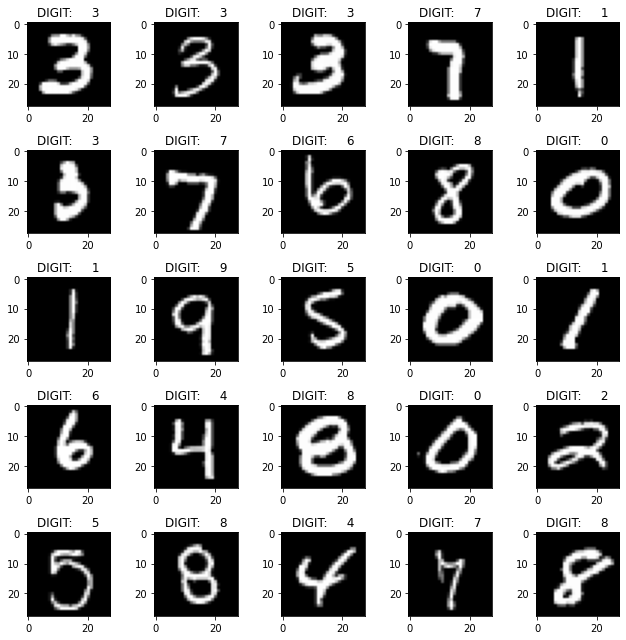

In [6]:
fig, axs = plt.subplots(5, 5,figsize=(9, 9))
#fig=figsize(10,10)
for i in range(5):
  for j in range(5):
    random = np.random.randint(10000) #random integer number generation
    row_pixels=X_data_features.iloc[random].values #pixels of the image 
    axs[i, j].imshow(row_pixels.reshape(28,28),cmap = "gray") #plot the digit randomly
    axs[i, j].set_title('DIGIT: {0:5d}'.format(y_data_target[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image

# Split the data into train and test using scikit-learn

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data_features, y_data_target, test_size=0.2,
                                                  random_state=43,shuffle=True)

# Here we define the Multiclass Logistic Regression classification model using the Multinomial probability distribution. Then, we train the model with training data.



In [8]:
#Modelo
#==============================================================================
logistic_regression = LogisticRegression(multi_class='multinomial',solver='newton-cg')

#Entrenamiento del modelo
# ==============================================================================
logistic_regression.fit(X_train,y_train)

/usr/lib64/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Here we show the probability matrix. where each sample has a probability of belong to each class. The sum of all probabilities of each sample is one.

In [14]:
#Probabilidad de cada muestra pertenecer a una clase
# ==============================================================================
Probs = pd.DataFrame(logistic_regression.predict_proba(X_test), columns=logistic_regression.classes_)
Probs.round(6)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.995480,0.0,0.00452
2,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.00000
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...
1995,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
1996,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
1997,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.999998,0.0,0.00000
1998,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.00000


# Here we do the predictions and print the metrics R2 and clasification report. 

In [15]:
# Predicciones test
# ==============================================================================
predicciones = logistic_regression.predict(X=X_test)
predicciones = predicciones.flatten()

#Metric R2
#===============================================================================
R2_Train=logistic_regression.score(X_train,y_train)
R2_Test=logistic_regression.score(X_test,y_test)

print("The R2 for Train set is: {:.4}".format(R2_Train))
print("The R2 for Test set is: {:.4} \n".format(R2_Test))

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test, predicciones))

The R2 for Train set is: 1.0
The R2 for Test set is: 0.8805 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       198
           1       0.96      0.94      0.95       226
           2       0.89      0.87      0.88       208
           3       0.85      0.88      0.86       219
           4       0.91      0.84      0.87       186
           5       0.76      0.78      0.77       184
           6       0.90      0.91      0.91       184
           7       0.93      0.94      0.93       200
           8       0.83      0.80      0.82       202
           9       0.82      0.91      0.86       193

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



# Then we show the Confusion Matrix to check for false positives, and see which digits have been wrongly predicted.

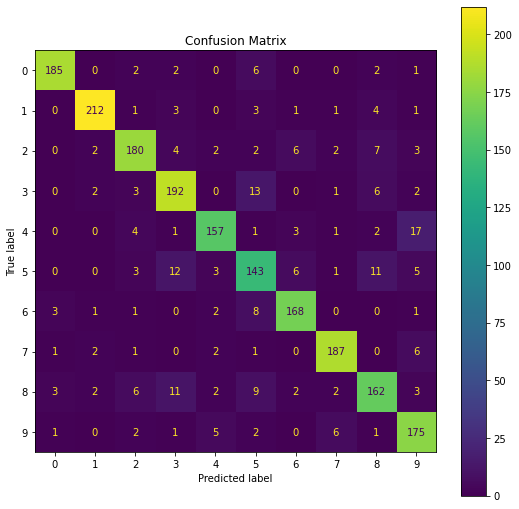

In [16]:
#Confusion Matrix
#===============================================================================
print("")
fig, ax = plt.subplots(figsize=(9, 9))
plot_confusion_matrix(logistic_regression, X_test, y_test,ax=ax)
plt.title("Confusion Matrix")
plt.show()

# Finally we show ten random samples with your respective true value and predicted value.

In [17]:
#choose 10 randomly cars
y_test_array=y_test.values.flatten()

random=np.random.randint(len(y_test_array), size=10)
random_True=[]
random_pred=[]
for i in random:
  random_True.append(y_test_array[i])
  random_pred.append(predicciones[i])

dict={"Digit True":random_True, "Digit Predict":random_pred}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid')) 

╒══════════════╤═════════════════╕
│   Digit True │   Digit Predict │
╞══════════════╪═════════════════╡
│            9 │               9 │
├──────────────┼─────────────────┤
│            0 │               0 │
├──────────────┼─────────────────┤
│            8 │               8 │
├──────────────┼─────────────────┤
│            8 │               5 │
├──────────────┼─────────────────┤
│            6 │               5 │
├──────────────┼─────────────────┤
│            0 │               0 │
├──────────────┼─────────────────┤
│            1 │               1 │
├──────────────┼─────────────────┤
│            7 │               7 │
├──────────────┼─────────────────┤
│            5 │               5 │
├──────────────┼─────────────────┤
│            1 │               1 │
╘══════════════╧═════════════════╛


# And then we show the digit image, where the title is the true digit and the predicted digit.

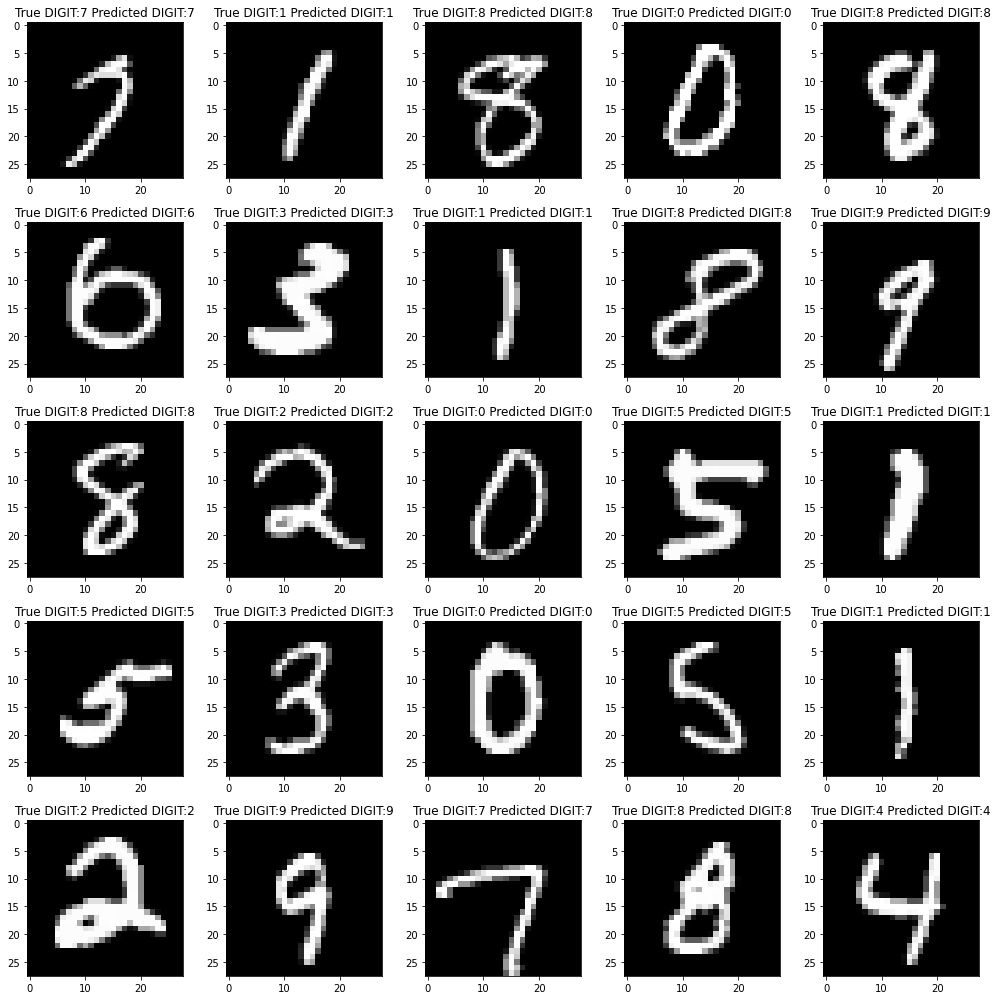

In [18]:
fig, axs = plt.subplots(5, 5,figsize=(14, 14))
#fig=figsize(10,10)
for i in range(5):
  for j in range(5):
    random = np.random.randint(2000) #random integer number generation
    row_pixels=X_test.iloc[random].values #pixels of the image 
    axs[i, j].imshow(row_pixels.reshape(28,28),cmap = "gray") #plot the digit randomly
    axs[i, j].set_title('True DIGIT:{0:1d} Predicted DIGIT:{0:1d}'.format(y_test_array[random],predicciones[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image